In [1]:
from datascience import *
import matplotlib
from path_data_variable import *
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [3]:
cut_off_at_100(17)

17

In [4]:
cut_off_at_100(117)

100

In [5]:
cut_off_at_100(100)

100

In [6]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person | Age
A      | 17
B      | 117
C      | 52
D      | 100
E      | 6
F      | 101

In [7]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100])

In [8]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person | Age  | Cut Off Age
A      | 17   | 17
B      | 117  | 100
C      | 52   | 52
D      | 100  | 100
E      | 6    | 6
F      | 101  | 100

In [9]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [10]:
cut_off = cut_off_at_100

In [11]:
cut_off

<function __main__.cut_off_at_100(x)>

In [12]:
# Data on heights of parents and their adult children
family_heights = Table.read_table(path_data + 'family_heights.csv').drop(3)
family_heights

family | father | mother | children | childNum | sex    | childHeight
1      | 78.5   | 67     | 4        | 1        | male   | 73.2
1      | 78.5   | 67     | 4        | 2        | female | 69.2
1      | 78.5   | 67     | 4        | 3        | female | 69
1      | 78.5   | 67     | 4        | 4        | female | 69
2      | 75.5   | 66.5   | 4        | 1        | male   | 73.5
2      | 75.5   | 66.5   | 4        | 2        | male   | 72.5
2      | 75.5   | 66.5   | 4        | 3        | female | 65.5
2      | 75.5   | 66.5   | 4        | 4        | female | 65.5
3      | 75     | 64     | 2        | 1        | male   | 71
3      | 75     | 64     | 2        | 2        | female | 68
... (924 rows omitted)

In [13]:
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights

Parent Average | Child
72.75          | 73.2
72.75          | 69.2
72.75          | 69
72.75          | 69
71             | 73.5
71             | 72.5
71             | 65.5
71             | 65.5
69.5           | 71
69.5           | 68
... (924 rows omitted)

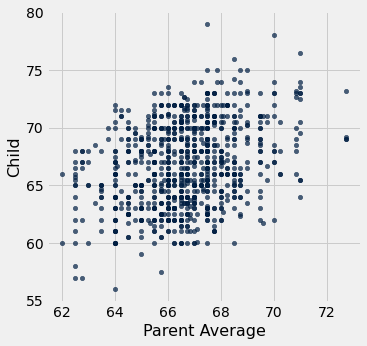

In [14]:
heights.scatter('Parent Average')

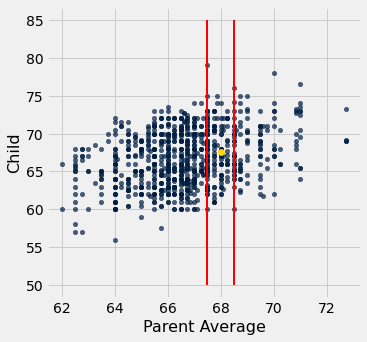

In [15]:
heights.scatter('Parent Average')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.62, color='gold', s=40);

In [16]:
close_to_68 = heights.where('Parent Average', are.between(67.5, 68.5))
close_to_68

Parent Average | Child
68             | 74
68             | 70
68             | 68
68             | 67
68             | 67
68             | 66
68             | 63.5
68             | 63
67.5           | 65
68.1           | 62.7
... (175 rows omitted)

In [17]:
np.average(close_to_68.column('Child'))

67.62

In [18]:
def predict_child(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))                     

In [19]:
predict_child(68)

67.62

In [20]:
predict_child(66)

66.08640776699029

In [21]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'Parent Average')
)

In [22]:
heights_with_predictions

Parent Average | Child | Prediction
72.75          | 73.2  | 70.1
72.75          | 69.2  | 70.1
72.75          | 69    | 70.1
72.75          | 69    | 70.1
71             | 73.5  | 70.4158
71             | 72.5  | 70.4158
71             | 65.5  | 70.4158
71             | 65.5  | 70.4158
69.5           | 71    | 68.5025
69.5           | 68    | 68.5025
... (924 rows omitted)

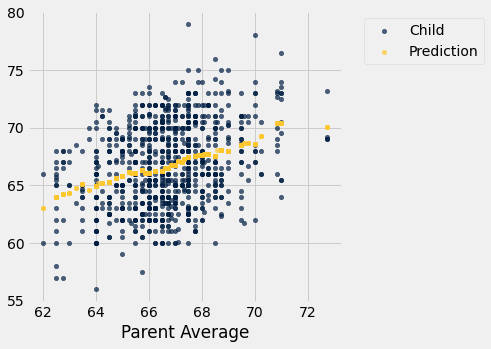

In [23]:
heights_with_predictions.scatter('Parent Average')

In [24]:
predict_child(65)

65.83829787234043